In [1]:
from harness import Harness
import pandas
from harness.ext import HarnessExtension

In [2]:


class NetworkXMixin:
    graph = None

class NetworkXExtension(HarnessExtension):
    imports = 'networkx'
    mixin = NetworkXMixin
    
    def keywords(self, dataframe):
        return {
            'G': lambda: dataframe.graph,
            'df': lambda: dataframe,
        }
    
    def to_graph(self, source, target, edge_attr=True, df=None):
        df.graph = self.module_.from_pandas_dataframe(
            df, source, target, edge_attr
        )
        return df.graph
    
    def callback(self, dataframe, value):
        if isinstance(value, self.module_.Graph):
            return dataframe
        return value
    
    def edges(self, df):
        return df.graph.edges()
    
    def nodes(self, df):
        return df.graph.nodes()
        

In [3]:
extensions = [
    'harness.ext.base.JinjaExtension',
    'harness.ext.SciKit.SciKitExtension', 
    'harness.ext.Bokeh.BokehModelsExtension',     
    'harness.ext.Bokeh.BokehPlottingExtension',
    'harness.ext.Bokeh.BokehChartsExtension',
    '__main__.NetworkXExtension'
]

In [4]:
df = Harness(pandas.np.random.randn(10,2), extensions=extensions)

In [5]:
df.to_graph(source=0, target=1)

,0,1
0,-0.282207,-0.397016
1,-1.631498,-0.994581
2,1.334416,-0.313173
3,0.452864,-1.494150
4,-0.796372,-0.164336
5,-0.076080,0.042908
6,0.325918,-1.468887
7,-0.831066,0.087651
8,0.071332,-0.737110
9,-0.530988,-1.073587


In [6]:
df.to_graph(0, 1).edges()

[(-0.28220693678044062, -0.39701556712530933),
 (-0.83106586418579353, 0.087651005067872961),
 (0.45286401834757717, -1.4941502874674799),
 (1.3344159018299877, -0.31317286750790163),
 (-0.076079991941336522, 0.042907602597190724),
 (0.32591815562673004, -1.4688865114099474),
 (-0.73710983778863381, 0.071332024073843522),
 (-0.53098785489182398, -1.0735870456615446),
 (-0.79637227526616949, -0.16433591963849029),
 (-1.6314977848894583, -0.99458107475358803)]

In [7]:
df.edges()

[(-0.28220693678044062, -0.39701556712530933),
 (-0.83106586418579353, 0.087651005067872961),
 (0.45286401834757717, -1.4941502874674799),
 (1.3344159018299877, -0.31317286750790163),
 (-0.076079991941336522, 0.042907602597190724),
 (0.32591815562673004, -1.4688865114099474),
 (-0.73710983778863381, 0.071332024073843522),
 (-0.53098785489182398, -1.0735870456615446),
 (-0.79637227526616949, -0.16433591963849029),
 (-1.6314977848894583, -0.99458107475358803)]

In [8]:
Harness(df.spring_layout()).transpose().sample(2)

,0,1
0.325918,0.796908,0.114316
-1.494150,0.477329,0.000000


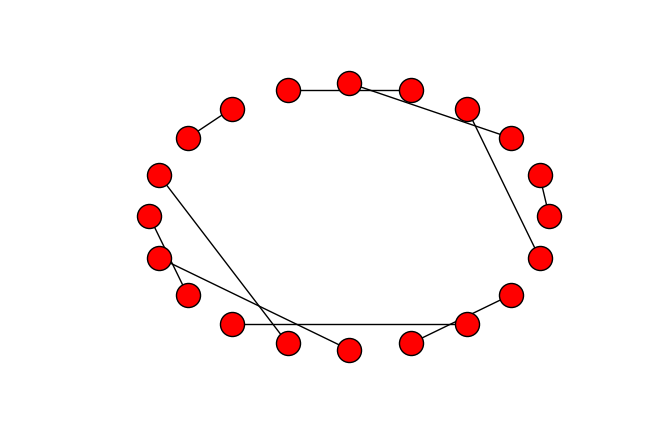

In [9]:
%matplotlib inline
df.draw_circular()